# Getting started with MPSlib
This a small example of geeting started with MPSlib through an iPython notebook

In [1]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


### Setup MPSLib

In [2]:
O = mps.mpslib(method='mps_snesim_tree',
                    n_real = 4, verbose_level=-1)
O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=49
O.par['simulation_grid_size']=np.array([180,80,1])

#print(O.par)

### Choose training image

In [3]:

#TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
TI, TI_filename = mps.trainingimages.rot90()
O.par['ti_fnam']=TI_filename

#O.plot_ti()

### Run MPSlib

In [4]:
O.run()

True

### Plot some realizations using matplotlib

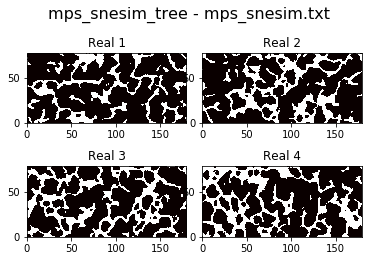

In [5]:
O.plot_reals()

### Plot some realizations using vista

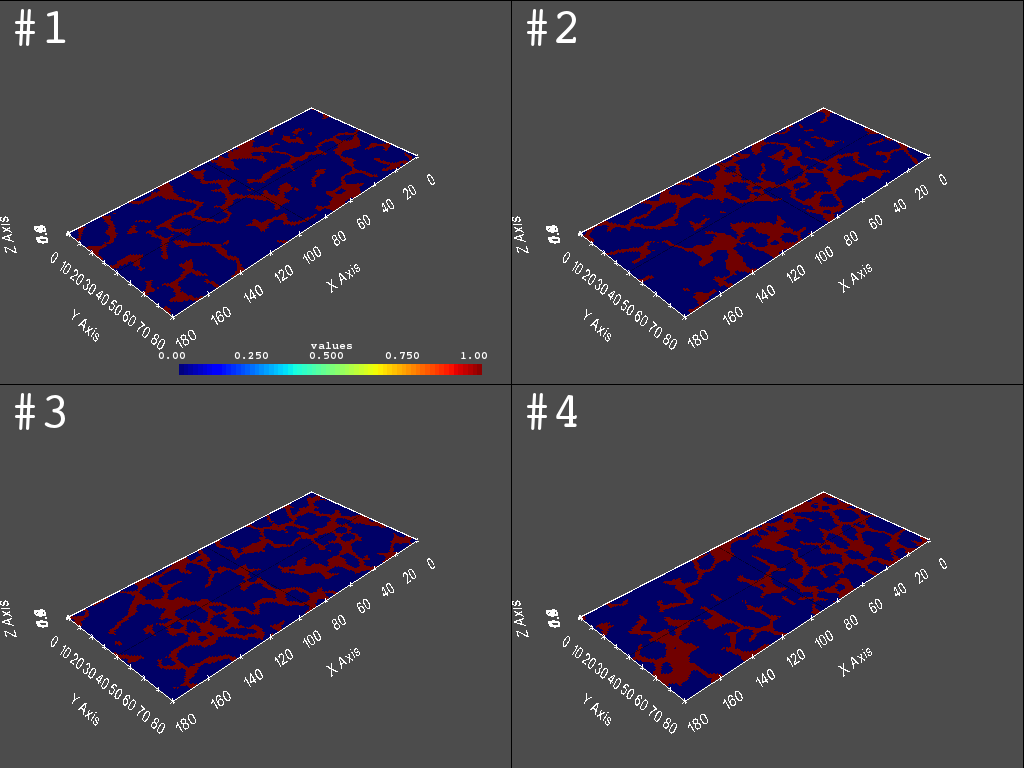

In [6]:
O.plot_reals_3d()